In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#preparing the data
myopia_df = pd.read_csv('Starter_Code/myopia.csv')
#drop myopic column
myopia_df = myopia_df.drop(['MYOPIC'], axis=1)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
#standardize df
scaler = StandardScaler()
scaled = scaler.fit_transform(myopia_df)
x = scaled
x

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [6]:
#perform dimensionality reduction with PCA
pca = PCA(n_components=.9)
X_pca = pca.fit_transform(x)
pca.explained_variance_ratio_.sum()

0.9187361702915186

In [8]:
#more reduction with t-SNE
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(x)
tsne_features.shape

C:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

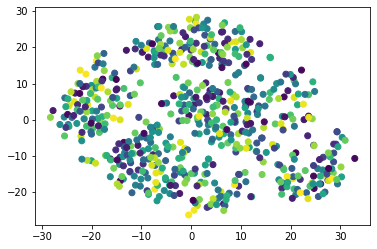

In [9]:
#create scatter plot of t-SNE
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = np.random.rand(618))
plt.show()

In [14]:
#create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_df)
    inertia.append(km.inertia_)
elbow_data_df = pd.DataFrame({'k':k, 'inertia': inertia})
elbow_data_df.head()

,k,inertia
0,1,234007.104068
1,2,126211.687610
2,3,93108.597058
3,4,78236.040289
4,5,67245.959484


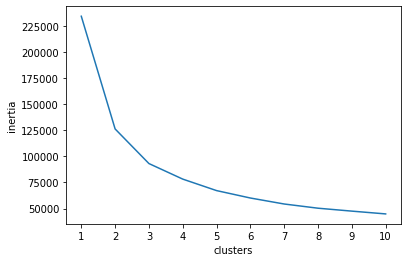

In [17]:
#plot elbow data
plt.plot(elbow_data_df['k'], elbow_data_df['inertia'])
plt.xticks(k)
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()

The patients can be clustered into 3 clusters. According to the plot above, the decrease in inertia starts at 2 but really falls off after 3. 3 clusters would give a better fit for the model than 2.